# Watson 과제 NO. 2
## DBSCAN 을 활용해 보자

but first, 개념 부터

1. DBSCAN은 특정 공간 내 밀도 차이 기반 알고리즘으로 하고 있어서
기하학적으로 복잡한 분포도를 가진 데이터 세트에 대해서 군집화를 잘 수행한다.
(O,X)

정답 : O

2. 입실론의 두 중요한 파라미터를 서술하시오

eps : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역

min_samples : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수

3. RFM이 무엇을 뜻하나요?

R: Recency (가장 최근 상품 구입 일에서 오늘까지의 기간)

F: Frequency (상품 구매 횟수)

M: Monetary Value (총 구매 금액)

# 실습입니다. 다음은 noisy_moon의 toy-dataset을 만들어 

## kmeans 와 dbscan 을 비교하는 것입니다. 

### 어렵지 않아요!!

# 문제는 코드 중간중간 빈칸을 작성하는 것입니다!

## 잘 찾아보세요

1. 필요한 것 import

In [1]:
import time
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import cluster, datasets

2. noisy_moon dataset 만들기, sample 갯수는 1000

In [2]:
n_samples = 1000

noisy_moon , y= datasets.make_moons(n_samples=n_samples, noise=.05)

clusterDF = pd.DataFrame(data = noisy_moon, columns = ['ftr1', 'ftr2'])

clusterDF['target'] = y

3. noisy_moon plot 해보기 (original data)


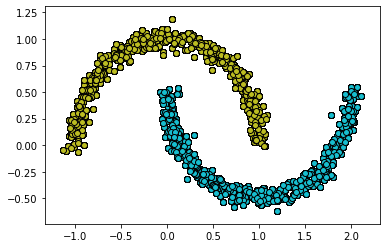

In [4]:
target_list = y

for target in target_list:
    target_cluster = clusterDF[clusterDF['target'] == target]
    plt.scatter(x = target_cluster['ftr1'], y = target_cluster['ftr2'], 
                edgecolor = 'k')

# 4. plot with KMEANS


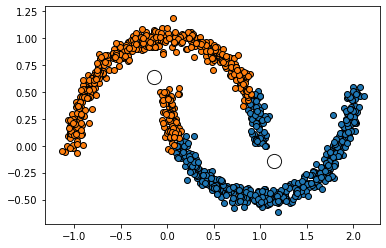

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, max_iter = 1000, random_state = 0)

kmeans_labels = kmeans.fit_predict(clusterDF)

clusterDF['kmeans_label'] = kmeans_labels

centers = kmeans.cluster_centers_ # kmeans 의 center 찾기
unique_labels = np.unique(kmeans_labels)

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y = label_cluster['ftr2'], edgecolor='k')
    
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color = 'white',
               alpha = 0.9, edgecolor = 'k')
    

# 5. plot with DBSCAN

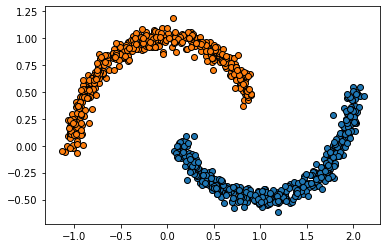

In [8]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.2, min_samples = 10, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(clusterDF)
clusterDF['dbscan_cluster'] = dbscan_labels

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['dbscan_cluster']==label] 
    plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'], 
                edgecolor = 'k')